# Importing Libraries and Datasets


In [ ]:
!git clone 'https://github.com/AnjnaBhati12/assignments.git'
!unzip '/content/assignments/data/saleforecasting/sales-prediction.zip' -d '/content/files'
!unzip '/content/files/*.zip' -d '/content'
!cp '/content/files/stores.csv' '/content/stores.csv'

Cloning into 'assignments'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.
Archive:  /content/assignments/data/saleforecasting/sales-prediction.zip
  inflating: /content/files/features.csv.zip  
   creating: /content/files/__MACOSX/
  inflating: /content/files/__MACOSX/._features.csv.zip  
  inflating: /content/files/stores.csv  
  inflating: /content/files/__MACOSX/._stores.csv  
  inflating: /content/files/test.csv.zip  
  inflating: /content/files/__MACOSX/._test.csv.zip  
  inflating: /content/files/train.csv.zip  
  inflating: /content/files/__MACOSX/._train.csv.zip  
Archive:  /content/files/test.csv.zip
  inflating: /content/test.csv       

Archive:  /content/files/features.csv.zip
  inflating: /content/features.csv   

Archive:  /content/files/train.csv.zip
  inflating: /content/train.csv      

3 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
stores=pd.read_csv('/content/stores.csv')
features=pd.read_csv('/content/features.csv')

# Exploratory Data Analysis

Analyzing the given csv files i.e. features and size.

In [ ]:
print(train.shape,test.shape,stores.shape,features.shape,)

(421570, 5) (115064, 4) (45, 3) (8190, 12)


In [ ]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [ ]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [ ]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [ ]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

Merging all the data into a single dataframe so that we can make use of given features and also we have to take care of only a single dataframe.
1-Store & Date
2-Store

In [ ]:
df_train=pd.merge(train,features, how='left')
df_train=pd.merge(df_train,stores, how='left')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
df_train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df_test=pd.merge(test,features, how='left')
df_test=pd.merge(df_test,stores, how='left')
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [ ]:
df_test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


The train dataset contains 421570 weekly sales records from 2010-02-05 to 2012-10-26 and test dataset starts from 2012-11-02 and runs until 07-26-2013 with 115064 records.

Dropping duplicates if any-

In [ ]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

Now lets take a look to number of Nan values presents in every columns.

In [ ]:
tab_info=df_train.isnull().sum()/(df_train.shape[0])*100
tab_info

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

We can see that here NaN is present in only MarkDowns columns and its ranging from 64% to ~74%.

**Finding the correlation among the features.**

In [ ]:
train_copy=df_train.copy()

In [ ]:
train_copy.Type = train_copy.Type.map( {'A':1 , 'B':2, 'C':3} )

In [ ]:
train_copy

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2,118221


**Correlation Matrix**

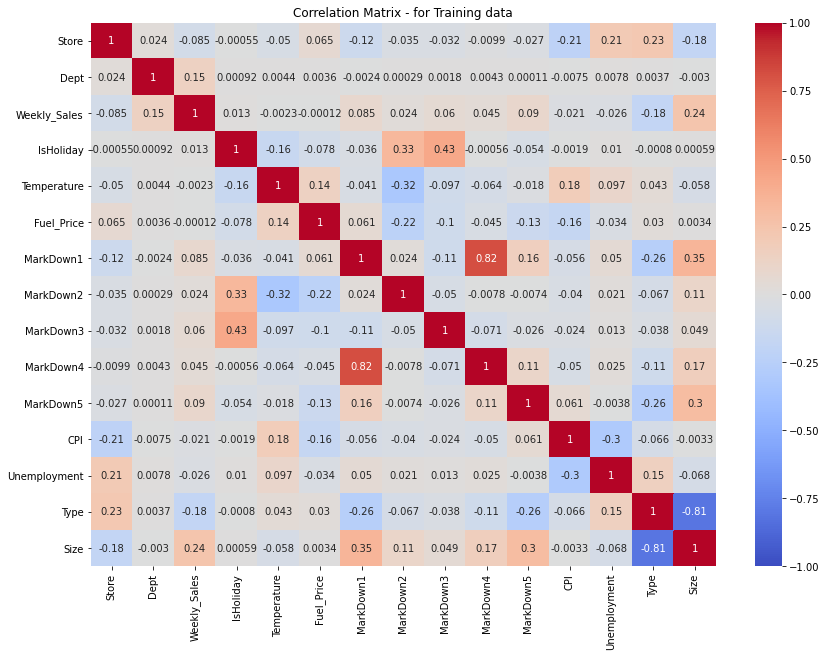

In [ ]:
import seaborn as sns
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(train_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - for Training data');

As we can see here **Temprature**(0.0023) and **Fuel_Price**(0.0012) are very less Correlated with Weekly_Sales, so we can **drop** them.

In [ ]:
df_train=df_train.drop(['Temperature','Fuel_Price'], axis = 1)


In [ ]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [ ]:
df_test=df_test.drop(['Temperature','Fuel_Price'], axis = 1)  


In [ ]:
df_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size'],
      dtype='object')

Replacing the **NaN** values with the mean of its columns.
mean-83%
median-86%
zeros-87%

In [ ]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


As we can see here the weekly sales are given in Date format, lets get some more insights from the given data using year, month and weeks

In [ ]:
  df_train.Date = pd.to_datetime(df_train.Date)
  df_train['Week'] = df_train.Date.dt.week
  df_train['Month'] = df_train.Date.dt.month
  df_train['Year'] = df_train.Date.dt.year
  df_train['WOM'] = [math.ceil(i/7) for i in df_train.Date.dt.day]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,WOM
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,1
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2,2010,2
2,1,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2,2010,3
3,1,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2,2010,4
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,3,2010,1


**Lets see some plots related to sales over different time mesures and gain some insights.**

*   Weekly_sales over the given dates

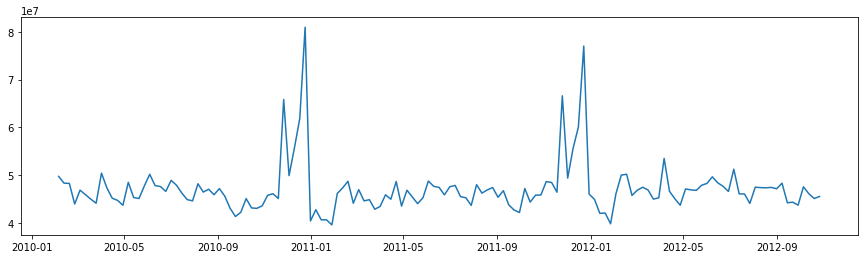

In [ ]:
df_plt=df_train.groupby(by=['Date'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** From the above plot we can see that, it has very strong seasonal behaviour at the end of the every year, which means the sales are highest at the end of every year.

*   Sales behaviour over weeks

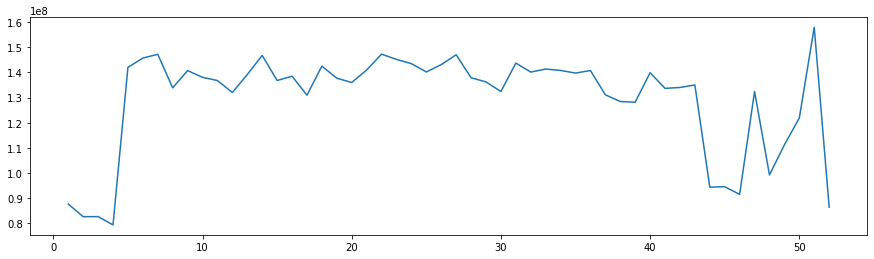

In [ ]:
df_plt=df_train.groupby(by=['Week'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** sales of every years havebeen grouped week-wise((ranging from 1-52) , and from the plot we can observed that sales are a bit down in 3rd or 4th week, similarly its also gets down in ~43th to 46th week, while its highest in last week(52th) of every year.

*   Yearly sales plot



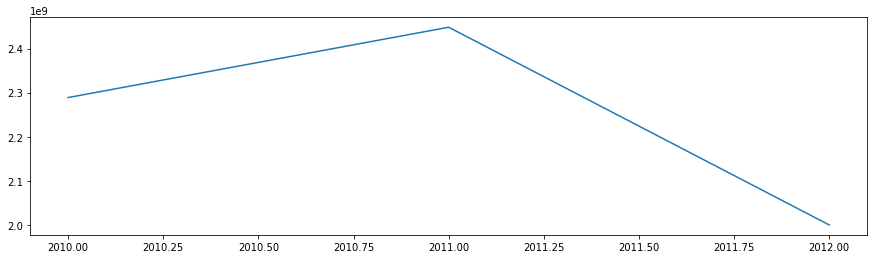

In [ ]:
df_plt=df_train.groupby(by=['Year'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** We can observed that sales is increasing in 2010-2011 but after that its started decreasing.

*   Week of months plot



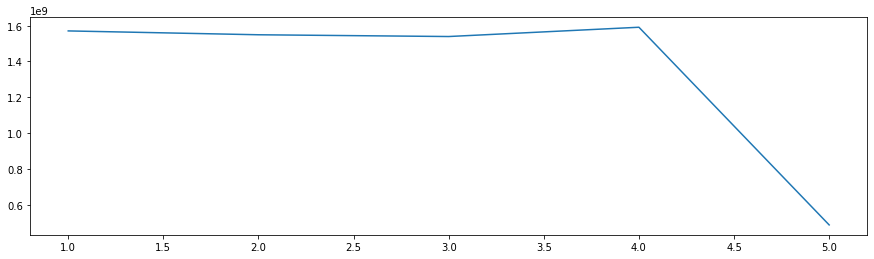

In [ ]:
df_plt=df_train.groupby(by=['WOM'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** Here **WOM** represents week of months, i.e. each month has 4 to 5 number of weeks, so here in this graph each week(1st, 2nd,3rd,4th,*5th) of every month hasbeen grouped ranging 2010-last.

we can see that the sales are almost same(minute up-down) in 1st to 4th week of every month, highest at 4th week of every month and gets dropped in 5th week.

*5th-Each month may not have 5 weeks.

*   Store wise sales





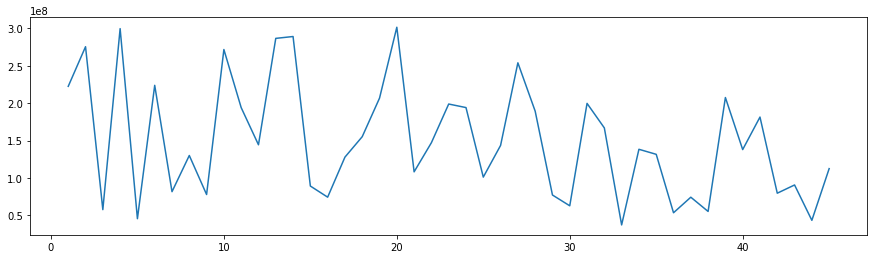

In [ ]:
df_plt=df_train.groupby(by=['Store'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** We can see that the maximum sales are at store_5 and store_20, means store_5 and store_20 contribute slighly higher than other stores in gross sale.

*   Dept wise sale




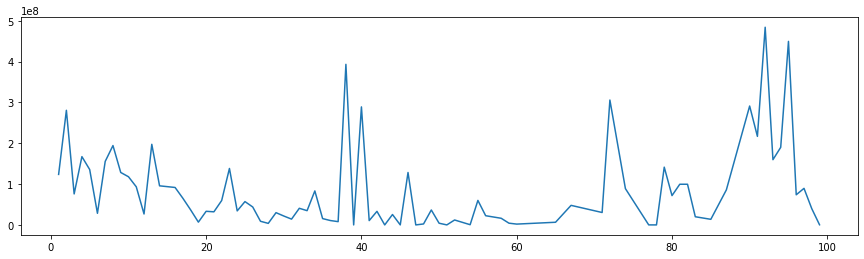

In [ ]:
df_plt=df_train.groupby(by=['Dept'], as_index=True)['Weekly_Sales'].sum()
plt.figure(figsize=(15,4))
plt.plot(df_plt.index, df_plt.values)
plt.show()

**Observations-** We can see that the maximum sales are made by the ~dept_90 to ~dept_97, means dept90 to dept97 sells are higher rather than other dept.

**Count/Bar Plot**


These plots will tell about how many records belong to the each cotegory of plotted features and this will also help to understand the leading as well as lagging between the categories of each features.

*   Type of Store plot [A,B,C]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


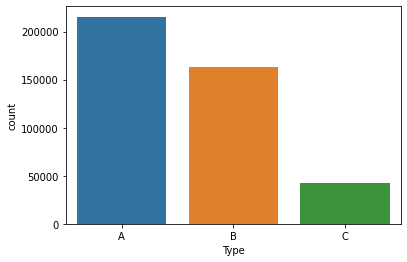

In [ ]:
sns.countplot(df_train['Type'])

*   Isholiday plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


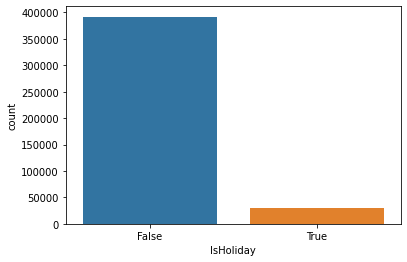

In [ ]:
sns.countplot(df_train['IsHoliday'])

*   Plot for years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


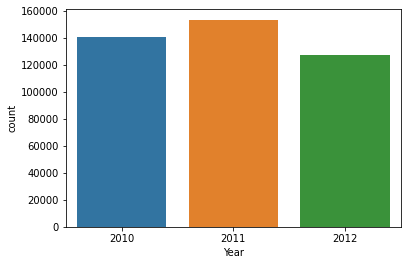

In [ ]:
sns.countplot(df_train['Year'])

*   Plot for store


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


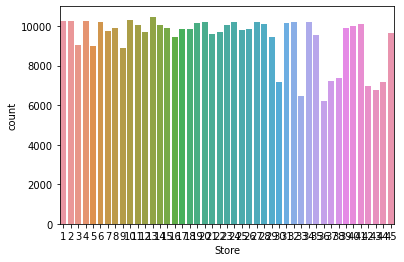

In [ ]:
sns.countplot(df_train['Store'])

*   Plot for Dept

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


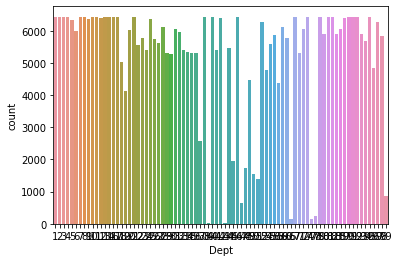

In [ ]:
sns.countplot(df_train['Dept'])

In [ ]:
cols=list(df_train.columns)
cols=cols[0:3]+cols[11:12]
cols

['Store', 'Dept', 'Date', 'Unemployment']

**Few more plots -scatter-plot**

These plots will help us to understand the variational change and spread of the features with the Weekly_Sales.

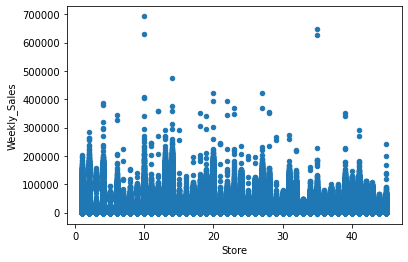

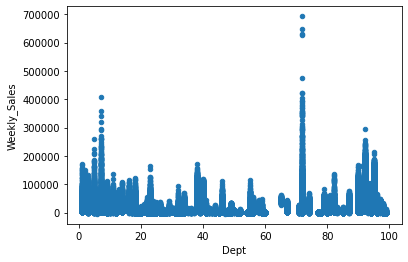

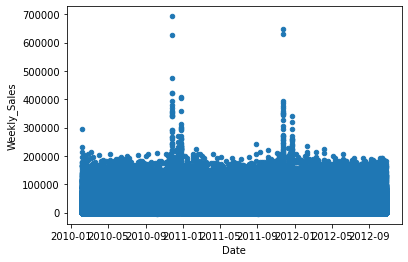

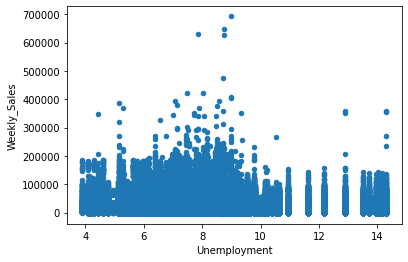

In [ ]:
for feature in cols:
  df_train.plot.scatter(x=str(feature), y='Weekly_Sales') 

A hybrid scatter-plot using features: Store, Weekly_Sales, Type and IsHoliday

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


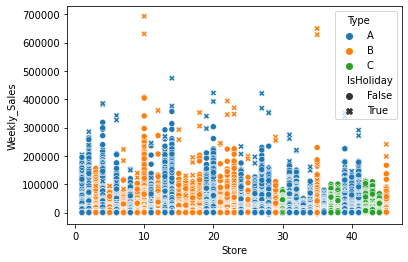

In [ ]:
sns.scatterplot(data=df_train, x="Store", y="Weekly_Sales", hue="Type", style="IsHoliday") 

# Data Preparation

For better interpretability making 'date' as primary index.

In [ ]:
df_train.Date=pd.to_datetime(df_train.Date)
df_train.set_index(keys="Date",inplace=True)

In [ ]:
df_test.Date=pd.to_datetime(df_test.Date)
df_test.set_index(keys="Date",inplace=True)

As we can see we have some fetures like Store, Dept and Type which are very important for the model but keeping them into numerical format will not be useful here, because they are being used as the categorical values.
So lets make them into categorical formats.

In [ ]:
df_train.Type=pd.Categorical(df_train.Type)
df_train.Store=pd.Categorical(df_train.Store)
df_train.Dept=pd.Categorical(df_train.Dept)

In [ ]:
df_test.Type=pd.Categorical(df_test.Type)
df_test.Store=pd.Categorical(df_test.Store)
df_test.Dept=pd.Categorical(df_test.Dept)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   Weekly_Sales  421570 non-null  float64 
 3   IsHoliday     421570 non-null  bool    
 4   MarkDown1     150681 non-null  float64 
 5   MarkDown2     111248 non-null  float64 
 6   MarkDown3     137091 non-null  float64 
 7   MarkDown4     134967 non-null  float64 
 8   MarkDown5     151432 non-null  float64 
 9   CPI           421570 non-null  float64 
 10  Unemployment  421570 non-null  float64 
 11  Type          421570 non-null  category
 12  Size          421570 non-null  int64   
 13  Week          421570 non-null  int64   
 14  Month         421570 non-null  int64   
 15  Year          421570 non-null  int64   
 16  WOM           421570 non-null  int64   
dtypes: bool(1), c

In [ ]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [ ]:
df_train.head()

,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year,WOM,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,...,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,5,2,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,6,2,2010,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315,7,2,2010,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315,8,2,2010,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315,9,3,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_test.head()

,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,...,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-11-02,False,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-11-09,False,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-11-16,False,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-11-23,True,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-11-30,False,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


No need to worry that Test datasest have less columns becuase the extra features are nothing but Weekly_Sales, Year, Month and Week. Which will be dropped later. 

# Train and Test set split

Spliting data yearly basis i.e. data before 2012 will be used for training and remaining will be used as testing and cross validation.

Now we have data from 2012 onwards for testing and cross validation, so making a split based on months .i.e. first 5 months data is used for cross validation and remaining are used for testing.


In [ ]:
TRAIN=df_train[df_train['Year'] < 2012]
TEST_=df_train[df_train['Year'] >= 2012]


In [ ]:
CV=TEST_[TEST_['Month'] < 6]
TEST=TEST_[TEST_['Month']>=6]

In [ ]:
Train_size=(TRAIN.shape[0])/(df_train.shape[0])
Train_size*100

69.77061935147188

In [ ]:
cv_size=(CV.shape[0])/(df_train.shape[0])
cv_size*100

14.791612306378537

In [ ]:
test_size=(TEST.shape[0])/(df_train.shape[0])
test_size*100

15.437768342149582

*   Train Size : 69.77%
*   CV Size    : 14.80%
*   Test Size  : 15.43%






Lets drop the extra features.

In [ ]:
TRAIN.drop(['Year','Month','Week','WOM'], inplace=True,axis=1)
TEST.drop(['Year','Month','Week','WOM'], inplace=True,axis=1)
CV.drop(['Year','Month','Week','WOM'], inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train=TRAIN.drop(['Weekly_Sales'], inplace=False,axis=1)
y_train=TRAIN[['Weekly_Sales']]

In [ ]:
x_test=TEST.drop(['Weekly_Sales'], inplace=False,axis=1)
y_test=TEST[['Weekly_Sales']]

In [ ]:
x_cv=CV.drop(['Weekly_Sales'], inplace=False,axis=1)
y_cv=CV[['Weekly_Sales']]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape,x_cv.shape, y_cv.shape

((294132, 138),
 (294132, 1),
 (65081, 138),
 (65081, 1),
 (62357, 138),
 (62357, 1))

In [ ]:
x_test.head()

,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,...,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-01,False,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-06-08,False,8813.81,116.80,64.55,2652.04,7161.91,221.749484,7.143,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-06-15,False,5621.99,109.60,0.25,2420.28,3083.26,221.762642,7.143,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-06-22,False,8624.56,171.25,3.05,2524.07,7063.68,221.803021,7.143,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-06-29,False,3965.73,161.60,NaN,435.99,4212.97,221.843400,7.143,151315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In the very first plot- '**Weekly_sales over the given dates**', we have seen that its forming a seasonality and a nice pattern means it can be solved as 'Time Series' problem too. 
But here we have too many stores and dept and its forming almost ~3300 of combinations(*chacked earlier). So training a time series model for each combination is a very big task here.

So, starting to solve this problem as the regression problem and lets see how accurate result can be obtained, although train and test split are done in such a way that it can able to preserve sequential informatio.

#Model Trainings

In [ ]:
import sklearn.metrics as metrics
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

**Model Evaluation Function**

In [ ]:
def model_evaluation(model):
  print("Cross Validation Scores-")
  y_cv_pred = model.predict(x_cv)
  print("MAE: ", metrics.mean_absolute_error(y_cv, y_cv_pred))
  print("MSE: ", metrics.mean_squared_error(y_cv, y_cv_pred)) 
  print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_cv, y_cv_pred)))
  print("R2-score:", metrics.r2_score(y_cv, y_cv_pred))
  print()
  print("Test Scores-")
  y_pred=model.predict(x_test)
  print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
  print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
  print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print("R2-score:", metrics.r2_score(y_test, y_pred))
  print()
  print("Delta MAE:",abs(metrics.mean_absolute_error(y_cv, y_cv_pred) - metrics.mean_absolute_error(y_test, y_pred)))
  print("Delta MSE:",abs(metrics.mean_squared_error(y_cv, y_cv_pred) - metrics.mean_squared_error(y_test, y_pred)))
  print("Delta RMSE:",abs(np.sqrt(metrics.mean_squared_error(y_cv, y_cv_pred)) - np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
  print("Delta R2-score:",abs(metrics.r2_score(y_cv, y_cv_pred) - metrics.r2_score(y_test, y_pred)))

**Linear Regression**

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
model_evaluation(LR)

Cross Validation Scores-
MAE:  8104.503253000761
MSE:  152198890.08643654
RMSE:  12336.891427196582
R2-score: 0.6916554266983213

Test Scores-
MAE:  8167.195611263307
MSE:  150361704.9787985
RMSE:  12262.206366669847
R2-score: 0.6900866538990212

Delta MAE: 62.692358262545895
Delta MSE: 1837185.1076380312
Delta RMSE: 74.68506052673547
Delta R2-score: 0.0015687727993000111


Considering Linear Regression model as the base model. We will try to optimise the results in further models.

**Decision Tree**

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
model_evaluation(DT)


Cross Validation Scores-
MAE:  4348.050554067707
MSE:  100658413.79769355
RMSE:  10032.866678955399
R2-score: 0.7960729172594697

Test Scores-
MAE:  4475.951105699051
MSE:  107507219.78119828
RMSE:  10368.568839584288
R2-score: 0.7784148416174024

Delta MAE: 127.90055163134457
Delta MSE: 6848805.9835047275
Delta RMSE: 335.70216062888903
Delta R2-score: 0.01765807564206734


**Random Forest**

In [ ]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
model_evaluation(RF)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Cross Validation Scores-
MAE:  3641.655073327774
MSE:  57852940.32881861
RMSE:  7606.112037619391
R2-score: 0.8827938877227938

Test Scores-
MAE:  3720.9053524577066
MSE:  59889953.864899255
RMSE:  7738.85998483622
R2-score: 0.8765596865058075

Delta MAE: 79.25027912993255
Delta MSE: 2037013.5360806435
Delta RMSE: 132.74794721682883
Delta R2-score: 0.006234201216986257


**Extra Tree Regressor**

In [ ]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
model_evaluation(ETR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Cross Validation Scores-
MAE:  4398.373126054813
MSE:  81825460.19028667
RMSE:  9045.742655541704
R2-score: 0.8342271971020379

Test Scores-
MAE:  4475.253207249428
MSE:  83346901.27338304
RMSE:  9129.452408188732
R2-score: 0.8282121297811552

Delta MAE: 76.88008119461483
Delta MSE: 1521441.08309637
Delta RMSE: 83.70975264702793
Delta R2-score: 0.006015067320882639


**XG-Boost Regressor**

In [ ]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
model_evaluation(XGB)

[07:05:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Scores-
MAE:  7938.424325655695
MSE:  123380001.27874072
RMSE:  11107.655075610726
R2-score: 0.7500405303438925

Test Scores-
MAE:  7999.972631432069
MSE:  125027643.5636543
RMSE:  11181.576076906793
R2-score: 0.7423031657070118

Delta MAE: 61.548305776374036
Delta MSE: 1647642.2849135846
Delta RMSE: 73.9210012960666
Delta R2-score: 0.007737364636880684


# Hyper-Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
_grid = {'n_estimators': [100,150,200],
               'min_samples_split': [2,4,6],
               'min_samples_leaf': [1, 2, 3],
               'max_depth':[20,25,30],
              'criterion':['mae']
               }
print(_grid)

{'n_estimators': [100, 150, 200], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3], 'max_depth': [20, 25, 30], 'criterion': ['mae']}


In [ ]:
_RF=RandomForestRegressor()
_RF_random=RandomizedSearchCV(estimator = _RF, param_distributions =_grid, cv=5, verbose=2, random_state=100, n_jobs=-1)
### fit the randomized model
_RF_random.fit(x_train,y_train)

In [ ]:
_RF_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
_grid = {'n_estimators': [100,150,200],
               #'min_samples_split': [2,4,6],
               #'min_samples_leaf': [1, 2, 3],
               #'max_depth':[20,25,30],
              'criterion':['mae']
               }
print(_grid)

{'n_estimators': [100, 150, 200], 'criterion': ['mae']}


In [ ]:
_RF=RandomForestRegressor()
_RF_grid=GridSearchCV(estimator = _RF, param_grid =_grid, cv=5, verbose=2,n_jobs=-1)
### fit the grid model
_RF_grid.fit(x_train,y_train)

In [ ]:
_RF_grid.best_params_

# Final prediction on given test data

Using the best model for the prediction of 'test.csv' data
* As we can see that from the previous all the models Random Forest Regressor is performing best. 
*   So, using Random Forest Regressor for future prediction.
*   Althogh it can be improved a bit by hypertuning the parameters, but for now I am not able to do so.






As we have alraedy saved our 'test.csv' in 'df_test' and also all the preprocessing hasbeen done already, so lets directly predict the weekly_sales for given data.

In [ ]:
df_test.shape

(115064, 138)

**Predicting**

In [ ]:
y_pred=RF.predict(df_test)

**Saving** the predicted values along with the given data in 'output.csv'

In [ ]:
output=pd.read_csv('test.csv') 
output['Weekly_Sales'] = y_pred
output.to_csv('Submission_.csv', index=False) 

# Plotting the final observed results

In [ ]:
df_sub=pd.read_csv('Submission_.csv')

In [ ]:
df_sub.Date = pd.to_datetime(df_sub.Date)
df_sub['Week'] = df_sub.Date.dt.week
df_sub['Year'] = df_sub.Date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


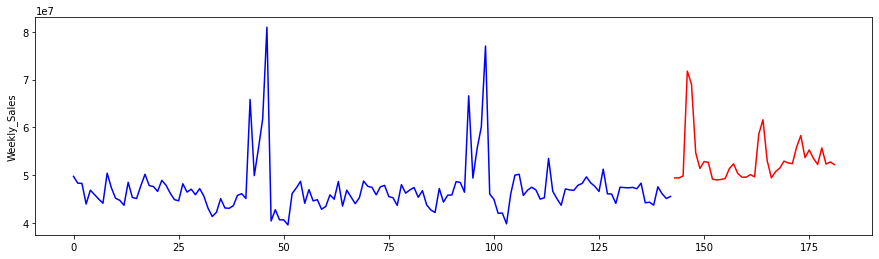

In [ ]:
sales_train=df_train.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
sales_test=df_sub.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

indices = sales_train.shape[0] + sales_test['Weekly_Sales'].index 

plt.figure(figsize=(15, 4))

sns.lineplot(sales_train['Weekly_Sales'].index,sales_train['Weekly_Sales'], color='blue')
sns.lineplot(indices,sales_test['Weekly_Sales'],color = 'red')


Done..!